<a href="https://colab.research.google.com/github/dbello612/Taller1/blob/main/Taller_1FC_Juanita_Rojas_%26_Diana_Bello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Externado de Colombia 

---

Finanzas Computacionales 
Taller 1

Integrantes del grupo:


*   Juanita Rojas Navarro
*   Diana Bello 



1. Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando pandas datareader. Con esta información:

a. Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los resultados en una tabla.

In [ ]:
!pip --quiet install yfinance
import numpy as np
import yfinance as yf 
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
import pandas_datareader.data as web

In [ ]:
yf.pdr_override()

In [ ]:
df = web.DataReader("VLON, NRBO", start = "2021-01-01", end = "2022-12-31")["Adj Close"]
df

[*********************100%***********************]  2 of 2 completed


,NRBO,VLON
Date,,
2021-01-04,154.800003,NaN
2021-01-05,167.100006,NaN
2021-01-06,200.399994,NaN
2021-01-07,176.100006,NaN
2021-01-08,187.500000,NaN
...,...,...
2022-12-23,0.813000,0.282
2022-12-27,0.840000,0.278
2022-12-28,0.680000,0.260


In [ ]:
retorno = np.log(df).diff()
retorno = retorno.dropna()
retorno

,NRBO,VLON
Date,,
2021-02-11,-0.023236,0.010582
2021-02-12,-0.003623,0.029814
2021-02-16,0.026859,0.000000
2021-02-17,-0.014235,-0.048407
2021-02-18,-0.036500,-0.014855
...,...,...
2022-12-23,-0.461666,-0.144990
2022-12-27,0.032671,-0.014286
2022-12-28,-0.211309,-0.066940


In [ ]:
#Retorno diario
retorno_1d = retorno.mean()
retorno_1d

NRBO   -0.011483
VLON   -0.006839
dtype: float64

In [ ]:
#Retorno mensual
retorno_1mo = retorno.mean()*21
retorno_1mo

NRBO   -0.241143
VLON   -0.143622
dtype: float64

In [ ]:
#retorno anual
retorno_1y = retorno.mean()*252
retorno_1y 

NRBO   -2.893715
VLON   -1.723469
dtype: float64

In [ ]:
#Tabla de retornos
datos ={'Diario' : [-0.011483, -0.006839],
        'Mensual': [-0.241143, -0.143622],
        'Anual': [-2.893715, -1.723469]}
filas = ['NRBO', 'VLON'] 
t_r = pd.DataFrame(datos, index = filas)
t_r

,Diario,Mensual,Anual
NRBO,-0.011483,-0.241143,-2.893715
VLON,-0.006839,-0.143622,-1.723469


b. Calcule los retornos esperados y volatilidades anualizadas.

In [ ]:
#retorno esperado anual
retorno_1y = retorno.mean()*252
retorno_1y 

NRBO   -2.893715
VLON   -1.723469
dtype: float64

In [ ]:
#Volatilidad anualizada
retorno.std()*np.sqrt(252)

NRBO    1.559203
VLON    1.609557
dtype: float64

c. Construya una tabla resumen con las estadísticas descriptivas de las series diarias
(media, mediana, desv. estándar, curtosis, simetría) de los dos activos.

In [ ]:
#Media
retorno.mean()

NRBO   -0.011483
VLON   -0.006839
dtype: float64

In [ ]:
#Mediana
retorno.median()

NRBO   -0.008959
VLON   -0.008034
dtype: float64

In [ ]:
#Desviación estándar 
retorno.std()

NRBO    0.098221
VLON    0.101393
dtype: float64

In [ ]:
#Curtosis
retorno.kurt()

NRBO    17.085810
VLON    48.193091
dtype: float64

In [ ]:
#Simetría
sim =retorno.skew()
sim

NRBO   -0.058219
VLON   -1.466704
dtype: float64

In [ ]:
datos ={'Media' : [-0.011483, -0.006839 ],
        'Mediana': [ -0.008959, -0.008034],
        'Std': [0.098221, 0.101393],
        'Curtosis':[17.085810, 48.193091],
        'Simetría':[-0.058219,-1.466704]}

filas = ['NRBO','VLON'] 
t_e = pd.DataFrame(datos, index = filas).transpose()
t_e

,NRBO,VLON
Media,-0.011483,-0.006839
Mediana,-0.008959,-0.008034
Std,0.098221,0.101393
Curtosis,17.085810,48.193091
Simetría,-0.058219,-1.466704


d. Compare las distribuciones empíricas de los dos activos con la distribución teórica normal.

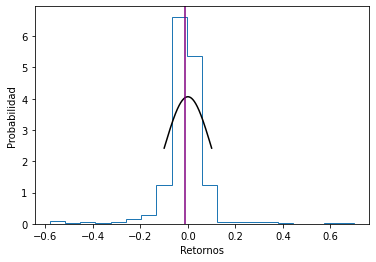

In [ ]:
x = np.linspace(-0.1,0.1,num=1000)
plt.hist(retorno['NRBO'],bins=20,density=True,histtype="step")
plt.plot(x,norm.pdf(x,scale=retorno['NRBO'].std()),'k')
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.axvline(retorno['NRBO'].mean(),color='purple');

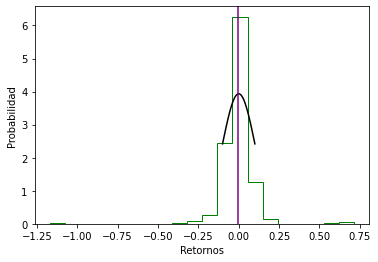

In [ ]:
x = np.linspace(-0.1,0.1,num=100)
plt.hist(retorno['VLON'],bins=20,density=True,histtype="step", color = "green")
plt.plot(x,norm.pdf(x,scale=retorno['VLON'].std()),'k')
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.axvline(retorno['VLON'].mean(),color='purple');

e. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.

In [ ]:
retorno.corr()

,NRBO,VLON
NRBO,1.00000,0.05575
VLON,0.05575,1.00000


In [ ]:
retorno['VLON'].corr(retorno['NRBO'],method= 'pearson')

0.05575027800954629

Rango de Kendall

In [ ]:
stats.kendalltau(retorno['VLON'], retorno['NRBO'])

KendalltauResult(correlation=0.13754160055593231, pvalue=7.388796834303888e-06)

In [ ]:
retorno['VLON'].corr(retorno['NRBO'],method= 'kendall')

0.13754160055593231

Rango de Spearman

In [ ]:
stats.spearmanr(retorno['VLON'], retorno['NRBO'])

SpearmanrResult(correlation=0.2065079207836066, pvalue=5.5543157207295645e-06)

In [ ]:
retorno['VLON'].corr(retorno['NRBO'], method='spearman')

0.2065079207836066

2. Escoja 10 acciones de su preferencia en el mercado estadounidense. Para estas acciones descargue las series de precios mensuales para el periodo Dic-17 a Dic-2022. Con esta información:

a. Calcule los retornos y volatilidades anualizadas.

In [ ]:
df2 = web.DataReader("NVDA,TSM,ASML,AVGO,CSCO,ACN,SAP,QCOM,MSFT,TXN", start = "2017-12-01", end = "2022-12-31", interval = "1mo")["Adj Close"]
df2

[*********************100%***********************]  10 of 10 completed


,ACN,ASML,AVGO,CSCO,MSFT,NVDA,QCOM,SAP,TSM,TXN
Date,,,,,,,,,,
2017-12-01,141.849045,164.651672,211.239883,32.658142,80.554298,47.886917,55.656052,102.865250,34.281734,90.749435
2018-01-01,148.900284,192.254654,205.298416,35.420872,89.472351,60.830009,59.333435,103.680038,39.175430,95.293877
2018-02-01,149.187469,185.083893,203.998840,38.468391,88.304588,59.889591,56.508026,95.669449,37.480782,94.667931
2018-03-01,142.228958,188.086700,195.051254,36.844784,86.354057,57.348969,48.584373,96.273674,37.835281,90.771126
2018-04-01,140.097824,178.509979,192.677124,38.047462,88.482872,55.692303,44.726376,101.464539,33.244205,88.621773
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,286.012970,486.230286,490.864014,43.957218,260.182922,150.856567,130.698624,85.220001,82.414124,162.743378
2022-09-01,255.117325,413.195129,436.674347,39.317730,232.245483,121.322899,112.264214,81.250000,67.790184,152.469101
2022-10-01,281.491669,469.969055,466.229889,44.655106,231.477661,134.935486,116.914558,96.059998,61.203098,158.231766


Se calcula la volatilidad con la serie diaria (r2) o con la anual(r2_y1)?

In [ ]:
retorno2 = np.log(df2).diff()
retorno2 = retorno2.dropna()
#Retorno anualizado
retorno2_1y = retorno2.mean()*12
retorno2_1y

ACN     0.125561
ASML    0.239465
AVGO    0.193016
CSCO    0.073924
MSFT    0.218191
NVDA    0.223145
QCOM    0.136149
SAP     0.000630
TSM     0.154080
TXN     0.118415
dtype: float64

In [ ]:
#volatilidad anualizada
volatilidad_1y = retorno2.std()*np.sqrt(12)
volatilidad_1y

ACN     0.264783
ASML    0.333663
AVGO    0.293006
CSCO    0.271049
MSFT    0.212894
NVDA    0.503973
QCOM    0.400824
SAP     0.313646
TSM     0.346695
TXN     0.246340
dtype: float64

b. Construya una tabla en la que se muestre un ranqueo de los activos de acuerdo con su retorno esperado.

In [ ]:
df_retorno_v = pd.concat([retorno2_1y,volatilidad_1y], axis=1)
df_retorno_v.columns = ["Retorno","Volatilidad"]
df_retorno_v

,Retorno,Volatilidad
ACN,0.125561,0.264783
ASML,0.239465,0.333663
AVGO,0.193016,0.293006
CSCO,0.073924,0.271049
MSFT,0.218191,0.212894
NVDA,0.223145,0.503973
QCOM,0.136149,0.400824
SAP,0.000630,0.313646
TSM,0.154080,0.346695
TXN,0.118415,0.246340


In [ ]:
df_retorno_v.sort_values("Retorno",ascending=False)

,Retorno,Volatilidad
ASML,0.239465,0.333663
NVDA,0.223145,0.503973
MSFT,0.218191,0.212894
AVGO,0.193016,0.293006
TSM,0.154080,0.346695
QCOM,0.136149,0.400824
ACN,0.125561,0.264783
TXN,0.118415,0.246340
CSCO,0.073924,0.271049
SAP,0.000630,0.313646


3. Descargue la serie mensual de precios del índice estadounidense Rusell para el periodo Dic-11 a Dic-2022. Con esta información calcule la volatilidad mensual y anualizada usando las siguientes medidas:

In [ ]:
df3= web.DataReader("^RUT", start = "2011-12-01", end = "2022-12-31", interval = "1mo")
df3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-01,734.510010,753.190002,705.780029,740.919983,740.919983,75366190000
2012-01-01,750.700012,800.219971,736.780029,792.820007,792.820007,79567560000
2012-02-01,796.989990,833.020020,796.989990,810.940002,810.940002,78385710000
2012-03-01,813.969971,847.919983,785.409973,830.299988,830.299988,83899660000
2012-04-01,828.890015,841.059998,783.559998,816.880005,816.880005,74761710000
...,...,...,...,...,...,...
2022-08-01,1870.489990,2030.050049,1843.079956,1844.119995,1844.119995,92252350000
2022-09-01,1826.750000,1906.089966,1650.709961,1664.719971,1664.719971,94241020000
2022-10-01,1687.280029,1854.569946,1641.939941,1846.859985,1846.859985,95823760000


In [ ]:
retorno3 = np.log(df3["Adj Close"]).diff()
retorno3 = retorno3.dropna()
#Retorno mensual
retorno3_1mo = retorno3.mean()
retorno3_1mo

0.006559745674424808

In [ ]:
#Retorno anual
retorno3_1y = retorno3.mean()*12
retorno3_1y

0.0787169480930977

a. Desviación estándar

In [ ]:
#Volatilidad mensual
retorno3.std()

0.054744795914794225

In [ ]:
#Volatilidad anual
retorno3.std()*np.sqrt(12)

0.1896415359488254

b. Parkinson

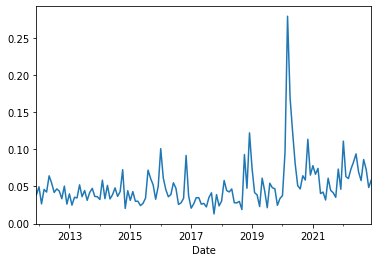

In [ ]:
lnHL = np.log(df3["High"]/df3["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot();

In [ ]:
#Volatilidad mensual
(sigmaPark_d.mean())*np.sqrt(30)

0.2794051181158537

In [ ]:
#Volatilidad anualizada de Parkinson
(sigmaPark_d.mean())*np.sqrt(252)

0.8097929662860792

c. Garman-Klass

In [ ]:
#Volatilidad mensual
lnHL = np.log(df3["High"]/df3["Low"]).dropna()
lnCO = np.log(df3["Close"]/df3["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.mean()

0.05239855062447297

In [ ]:
#Volatilidad anual
sigmaGK_d.mean()*np.sqrt(12)

0.1815139038491142

d. Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94.

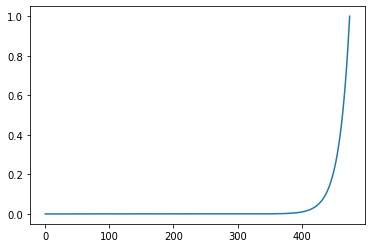

In [ ]:
Lambda = 0.94
k = len(retorno)
td = np.arange(k-1,-1,-1)
alpha = Lambda**td
pd.Series(alpha).plot();

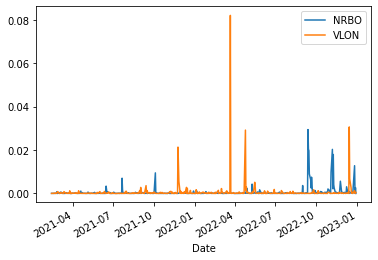

In [ ]:
lambda_ = 0.94
r = retorno
k = 1
A_k = (1-lambda_)**lambda_**(k-1)
t = 1
sigma_EWMA = A_k*r.shift(1)**2
sigma_EWMA.plot();

In [ ]:
def vol_ewma(retorno,Lambda):
  k = len(retorno)
  td = np.arange(k-1,-1,-1)
  alpha = Lambda**td   #np.power(Lambda,td)
  var_s = (retorno**2*alpha).sum()*(1-Lambda) #Varianza diaria promedio
  vol_d = np.sqrt(var_s) #Volatilidad diaria
  return(vol_d)

In [ ]:
def vol_ewma(retorno,Lambda):
  k = len(retorno)
  td = np.arange(k-1,-1,-1)
  alpha = Lambda**td
  var_s = (retorno**2*alpha).sum()*(1-Lambda)
  vol_d = np.sqrt(var_s)
  return(vol_d)


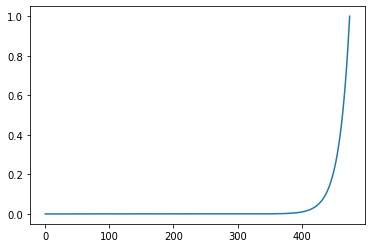

In [ ]:
Lambda = 0.94
k = len(retorno)
td = np.arange(k-1,-1,-1)
alpha = Lambda**td
pd.Series(alpha).plot()

In [ ]:
def ewma_vol(retorno,Lambda):
  k = len(retorno)                     
  e = np.arange(k-1,-1,-1)             
  alpha = Lambda**e                    
  s_var = (retorno**2)*alpha           
  var = s_var.sum()*(1-Lambda)         
  vol = np.sqrt(var)                   
  return(vol)

In [ ]:
precios = yf.download('VLON', start = "2021-01-01", end = "2022-12-31")["Adj Close"]
retorno = np.log(precios/precios.shift()).dropna()

vol_ewma = ewma_vol(retorno,Lambda=0.94)
vol_ewma

[*********************100%***********************]  1 of 1 completed


0.15590628771585965

In [ ]:
vol_ewma*np.sqrt(252)

2.474935590764694

In [ ]:
preciosn = yf.download('NRBO', start = "2021-01-01", end = "2022-12-31")["Adj Close"]
retornon = np.log(preciosn/preciosn.shift()).dropna()

vol_ewman = ewma_vol(retornon,Lambda=0.94)
vol_ewman

[*********************100%***********************]  1 of 1 completed


0.15810800605625602

In [ ]:
vol_ewman*np.sqrt(252)

2.509886785878886